In [1]:
import pandas as pd
import numpy as np

In [2]:
excel = pd.read_excel("Reviews-Asmi.xlsx")

In [3]:
table_rating = excel.rename(columns={'reviewerName': 'User','categories': 'Product'})

In [4]:
table_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rating                1200 non-null   int64 
 1   User                  1200 non-null   object
 2   Product               1200 non-null   object
 3   gPlusPlaceId          1200 non-null   object
 4   unixReviewTime        1200 non-null   object
 5   reviewTime            1200 non-null   object
 6   gPlusUserId           1200 non-null   object
 7   reviews/categories/1  552 non-null    object
 8   reviews/categories/2  294 non-null    object
dtypes: int64(1), object(8)
memory usage: 84.5+ KB


In [5]:
table_rating["Product"].value_counts()

Restaurant                  107
Hotel                        70
None                         59
Asian Restaurant             57
European Restaurant          24
                           ... 
Hairdresser                   1
Advertising Agency            1
其他美食-其他美食                     1
Hoteles                       1
Lawn Sprinkler System...      1
Name: Product, Length: 407, dtype: int64

In [6]:
table_rating_new = table_rating.groupby(['User', 'Product']).agg({'rating': ['mean']})

In [7]:
matrice_rating = pd.pivot_table(table_rating_new,index=["User"],columns=['Product'], values=['rating']).fillna(0)

In [8]:
matrice_rating.head()

rating                                  \
                         mean                                   
Product          ATM Location Acupuncture Clinic Acura Dealer   
User                                                            
Aaron Watters             0.0                0.0          0.0   
Abdalla Mhyo              0.0                0.0          0.0   
Abdul Hmouda              0.0                0.0          0.0   
Abhijeet Acharya          0.0                0.0          0.0   
Abinand E                 0.0                0.0          0.0   

                                                                          \
                                                                           
Product          Administracif3n Pfablica y... Adult Entertainment Store   
User                                                                       
Aaron Watters                              0.0                       0.0   
Abdalla Mhyo                               0.0                       0.0   
Abdul Hmouda                               0.0                       0.0   
Abhijeet Acharya                           0.0                       0.0   
Abinand E                                  0.0                       0.0   

                                                                     \
                                                                      
Product          Advertising Agency Aircraft Rental Service Airport   
User                                                                  
Aaron Watters                   0.0                     0.0     0.0   
Abdalla Mhyo                    0.0                     0.0     0.0   
Abdul Hmouda                    0.0                     0.0     0.0   
Abhijeet Acharya                0.0                     0.0     0.0   
Abinand E                       0.0                     0.0     0.0   

                                                     ...                    \
                                                     ...                     
Product          American Restaurant Amusement Park  ... 日常外食／小吃 日本料理  焼肉店   
User                                                 ...                     
Aaron Watters                    0.0            0.0  ...     0.0  0.0  0.0   
Abdalla Mhyo                     0.0            0.0  ...     0.0  0.0  0.0   
Abdul Hmouda                     0.0            0.0  ...     0.0  0.0  0.0   
Abhijeet Acharya                 0.0            0.0  ...     0.0  0.0  0.0   
Abinand E                        0.0            0.0  ...     0.0  0.0  0.0   

                                                                
                                                                
Product          特色住宿-民宿  製造業 觀光購物-百貨公司 鍋類-麻辣火鍋   陶芸 餐飲美食 재래시장  
User                                                            
Aaron Watters        0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abdalla Mhyo         0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abdul Hmouda         0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abhijeet Acharya     0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abinand E            0.0  0.0       0.0     0.0  0.0  0.0  0.0  

[5 rows x 407 columns]

In [9]:
multiplication_vector = matrice_rating.dot(matrice_rating.T)
norm_user = np.sqrt((matrice_rating**2).sum(axis = 1))
matrice_norm = np.outer(norm_user, norm_user)
matrice_similarite_cacul = multiplication_vector/matrice_norm

In [10]:
matrice_similarite_cacul.head()

User,Aaron Watters,Abdalla Mhyo,Abdul Hmouda,Abhijeet Acharya,Abinand E,Adam Perry,Adrian Villarreal,Adriel Chan,Ahmad Syameel Anuar,Alan Tower,...,吳明錦,吳雨澄,如月蒼薇,小劉文彬,李棟梁,翁煒智,陳建良,黃小胖,黃郁惠,구시아
User,,,,,,,,,,,,,,,,,,,,,
Aaron Watters,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abdalla Mhyo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abdul Hmouda,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abhijeet Acharya,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.650945,0.0,1.0,0.0
Abinand E,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [11]:
pip install networkx

In [12]:
import networkx as nx
G = nx.Graph()

In [13]:
G = nx.from_pandas_adjacency(matrice_similarite_cacul)

In [14]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 476\nNumber of edges: 5503\nAverage degree:  23.1218'

In [15]:
FG = nx.Graph()

In [20]:
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt > 0.85 and n != nbr : FG.add_weighted_edges_from([(n, nbr, wt)]) 

In [21]:
# FG.edges(data=True)
FG["Abhijeet Acharya"]

AtlasView({'Alessio Nocerino': {'weight': 1.0}, 'Ali Gokcek': {'weight': 0.9284766908852593}, 'Andrey C': {'weight': 1.0}, 'Ashley Craig': {'weight': 0.7808688094430304}, 'Aure9lie Balmy': {'weight': 1.0}, 'Brianna bounds': {'weight': 1.0}, 'Cristina P.': {'weight': 0.7071067811865476}, 'Cristobal Saavedra': {'weight': 1.0}, 'Giovanni Vernengo': {'weight': 0.7071067811865475}, 'Hermes Luca': {'weight': 0.7071067811865475}, 'Jason W. Crews': {'weight': 0.7808688094430304}, 'Juan Angel Garcia Fimia': {'weight': 0.7071067811865475}, 'Lewis Small': {'weight': 0.7001400420140048}, 'Linette Ida': {'weight': 0.7071067811865475}, 'Lori Ann Hoffman': {'weight': 1.0}, 'Maggie Johnson': {'weight': 1.0}, 'Michelle Newby': {'weight': 1.0}, 'Nakamura Zen': {'weight': 0.7071067811865475}, 'Regiane Rodrigues': {'weight': 1.0}, 'Shey La': {'weight': 1.0}, 'Shila Ghashghaee': {'weight': 1.0}, 'Wolfgang Graf': {'weight': 0.8}, 'Zaaheda Hosein': {'weight': 1.0}, 'Zozo Sharbjy': {'weight': 1.0}, 'isaqeu je

In [22]:
nx.info(FG)

'Name: \nType: Graph\nNumber of nodes: 267\nNumber of edges: 1513\nAverage degree:  11.3333'

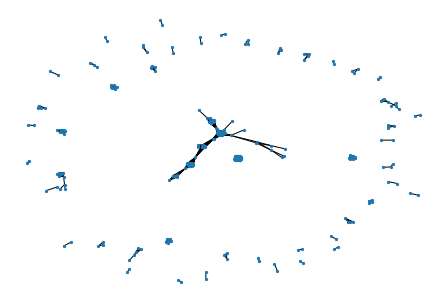

In [23]:
nx.draw(FG,font_weight='bold', node_size=5, weight_size=0.2, width=1)